<ipython-input-3-1cedfeb757d5>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  eda_data['Age'].fillna(eda_data['Age'].median(), inplace=True)
<ipython-input-3-1cedfeb757d5>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Patient ID           0
Age                  0
Gender               0
BMI                  0
Blood Pressure       0
Cholesterol Level    0
Disease History      0
Smoking Status       0
Exercise Level       0
Diet Type            0
Sleep Hours          0
dtype: int64
Outliers Count per Column:
Age            0
BMI            0
Sleep Hours    0
dtype: int64


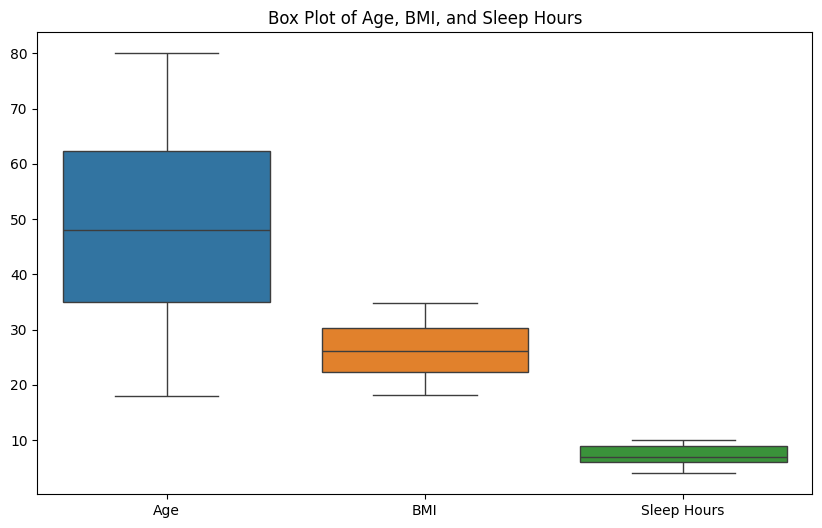

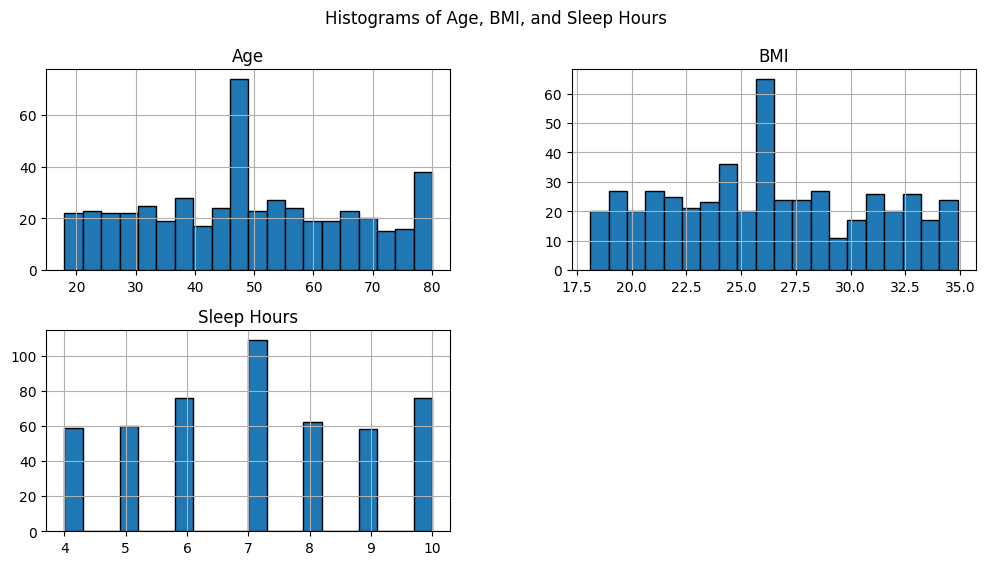

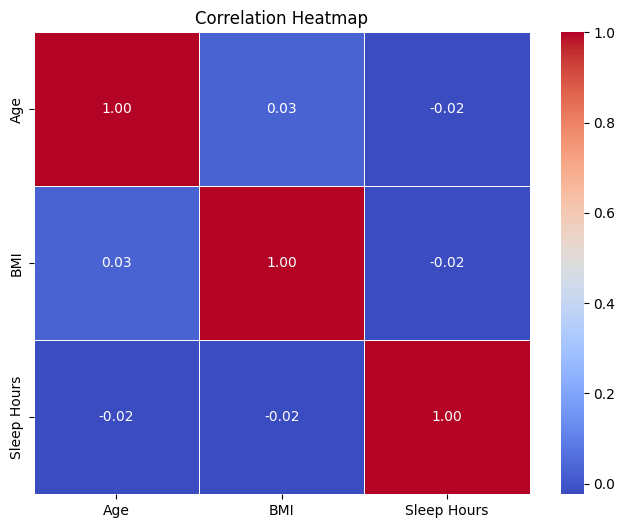

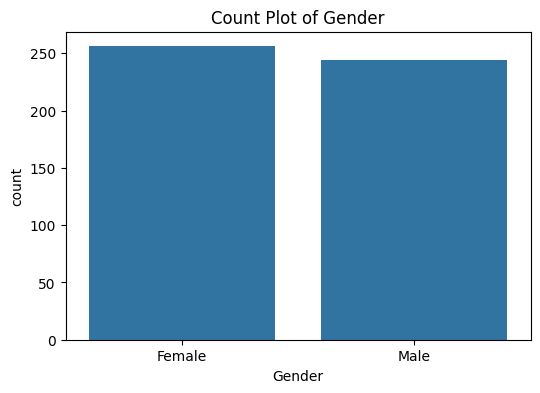

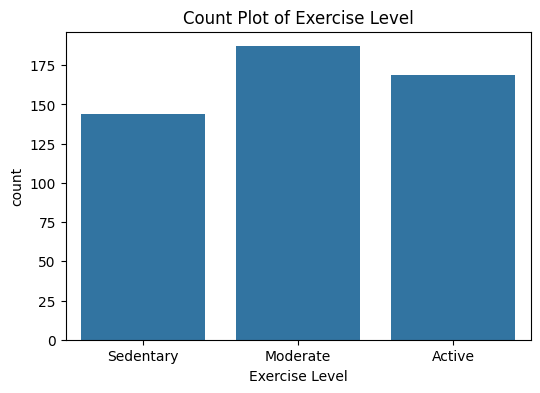

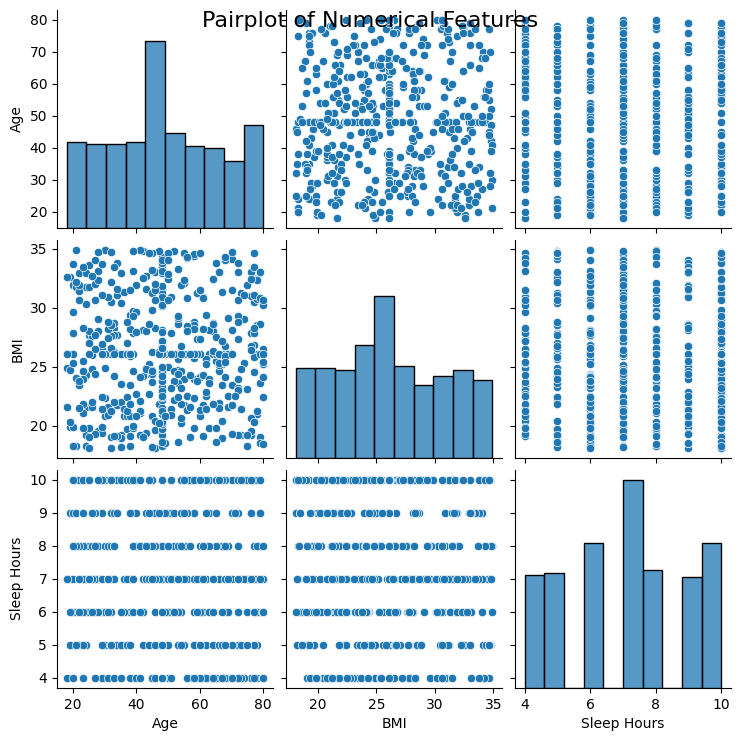

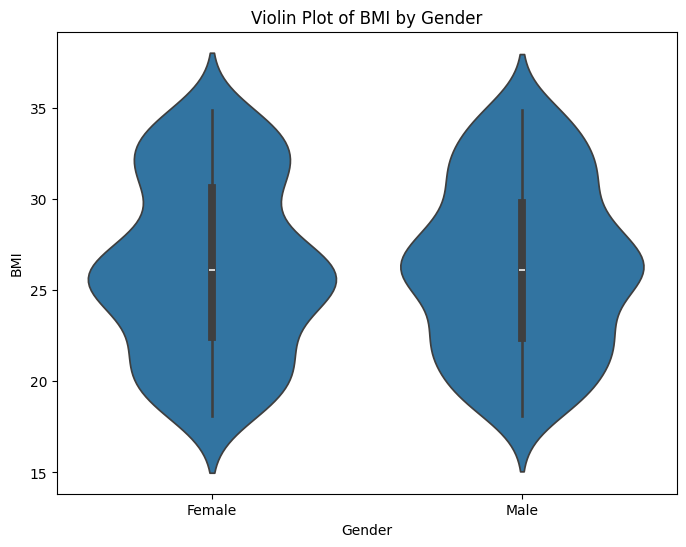

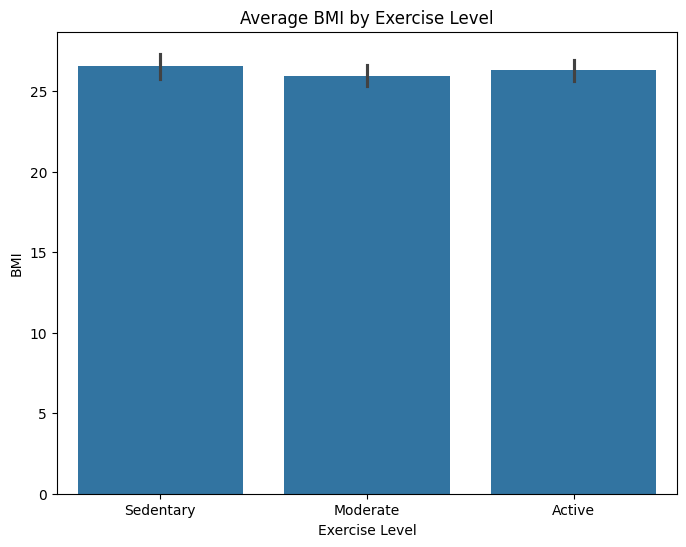

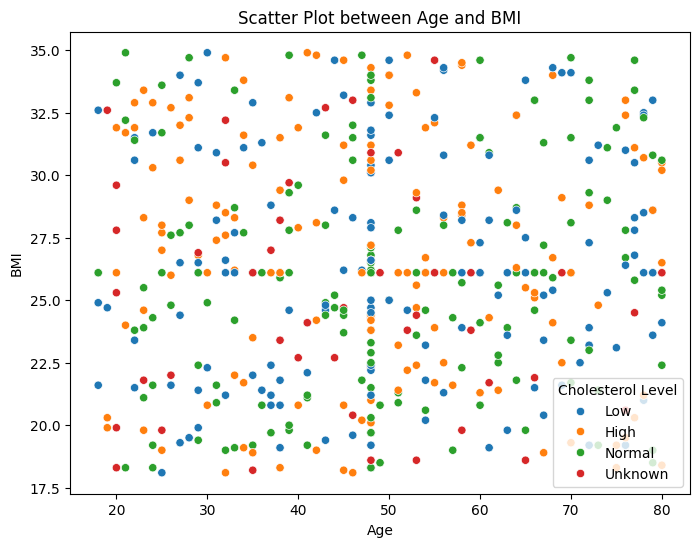

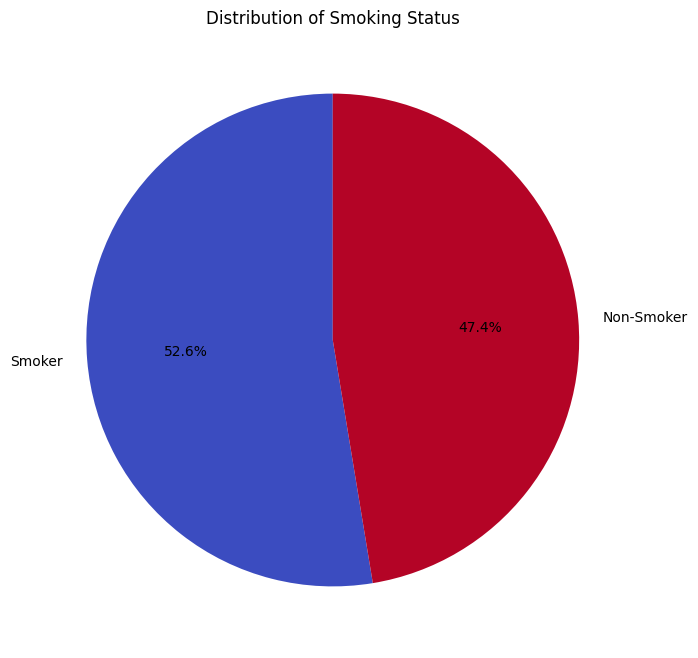

----------------------------------------------------------


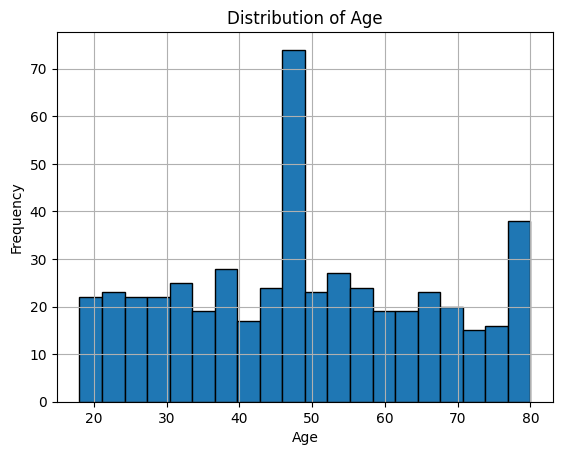

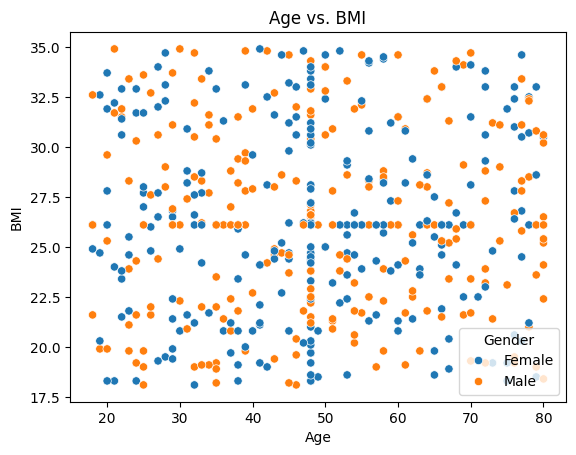

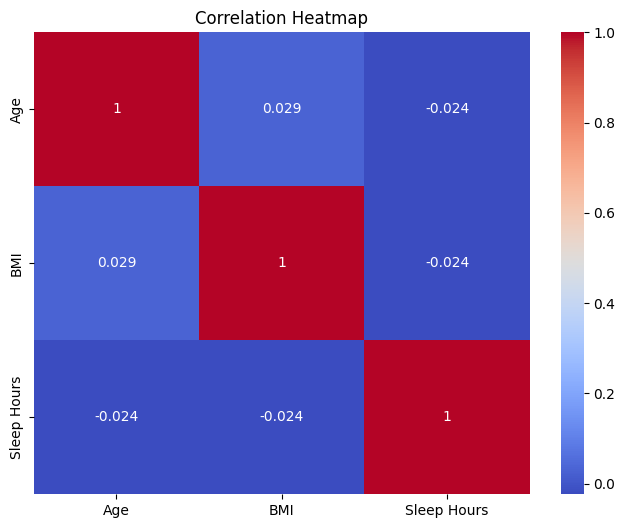

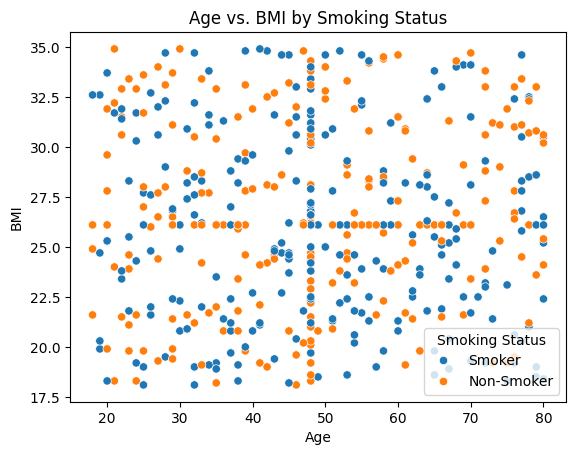

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'health_dataset_for_eda.csv'
eda_data = pd.read_csv('/content/sample_data/health_dataset_for_eda.csv')


# For numerical columns (Age, BMI, Sleep Hours), fill missing values with the median
eda_data['Age'].fillna(eda_data['Age'].median(), inplace=True)
eda_data['BMI'].fillna(eda_data['BMI'].median(), inplace=True)
eda_data['Sleep Hours'].fillna(eda_data['Sleep Hours'].median(), inplace=True)

# For categorical columns (Disease History), fill missing values with the mode (most frequent value)
eda_data['Disease History'].fillna(eda_data['Disease History'].mode()[0], inplace=True)

# For Cholesterol Level, let's assume missing values mean 'Unknown'
eda_data['Cholesterol Level'].fillna('Unknown', inplace=True)


print(eda_data.isnull().sum())

# Assuming 'data' is your DataFrame and you have the required columns
numerical_columns = ['Age', 'BMI', 'Sleep Hours']

# Calculate the first (Q1) and third (Q3) quartiles for the numerical columns
Q1 = eda_data[numerical_columns].quantile(0.25)
Q3 = eda_data[numerical_columns].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper limits for each column based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers by checking if the values are below the lower bound or above the upper bound
outliers = (eda_data[numerical_columns] < lower_bound) | (eda_data[numerical_columns] > upper_bound)

# Count how many outliers exist in each of the columns
outliers_per_column = outliers.sum()

# Display the number of outliers per column
print("Outliers Count per Column:")
print(outliers_per_column)

# Cap the outliers to upper and lower bounds
eda_data['BMI'] = eda_data['BMI'].clip(lower=lower_bound['BMI'], upper=upper_bound['BMI'])

# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(data=eda_data[['Age', 'BMI', 'Sleep Hours']])
plt.title('Box Plot of Age, BMI, and Sleep Hours')
plt.show()

# Histograms
eda_data[['Age', 'BMI', 'Sleep Hours']].hist(bins=20, figsize=(12, 6), edgecolor='black')
plt.suptitle('Histograms of Age, BMI, and Sleep Hours')
plt.show()

# Correlation Heatmap
correlation = eda_data[['Age', 'BMI', 'Sleep Hours']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Count Plots
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=eda_data)
plt.title('Count Plot of Gender')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Exercise Level', data=eda_data)
plt.title('Count Plot of Exercise Level')
plt.show()

# Pairplot
sns.pairplot(eda_data[['Age', 'BMI', 'Sleep Hours']])
plt.suptitle('Pairplot of Numerical Features', size=16)
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='BMI', data=eda_data)
plt.title('Violin Plot of BMI by Gender')
plt.show()

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Exercise Level', y='BMI', data=eda_data)
plt.title('Average BMI by Exercise Level')
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', data=eda_data, hue='Cholesterol Level')
plt.title('Scatter Plot between Age and BMI')
plt.show()

# Pie Chart
smoking_status_counts = eda_data['Smoking Status'].value_counts()
plt.figure(figsize=(8, 8))
smoking_status_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Distribution of Smoking Status')
plt.ylabel('')
plt.show()

print("----------------------------------------------------------")
# Univariate Analysis: Histogram for Age
eda_data['Age'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis: Scatter Plot for Age vs. BMI
sns.scatterplot(x='Age', y='BMI', data=eda_data, hue='Gender')
plt.title('Age vs. BMI')
plt.show()

# Multivariate Analysis: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(eda_data[['Age', 'BMI', 'Sleep Hours']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Multivariate Visualization: Age vs. BMI with Smoking Status as Hue
sns.scatterplot(x='Age', y='BMI', hue='Smoking Status', data=eda_data)
plt.title('Age vs. BMI by Smoking Status')
plt.show()


### **Dataset Description**  

This dataset contains patient health records with key attributes related to lifestyle and medical history. Each row represents an individual patient, with the following attributes:  

- **Patient ID**: Unique identifier for each patient.  
- **Age**: Patient's age in years.  
- **Gender**: Biological sex (Male/Female).  
- **BMI**: Body Mass Index, indicating weight status.  
- **Blood Pressure**: Categorical values indicating normal, low, or high blood pressure.  
- **Cholesterol Level**: Indicates cholesterol status (Low/Normal/High).  
- **Disease History**: Records of past medical conditions.  
- **Smoking Status**: Indicates if the patient is a smoker or non-smoker.  
- **Exercise Level**: Describes activity level (Sedentary, Moderate, or Active).  
- **Diet Type**: Type of diet followed (Vegetarian/Non-Vegetarian).  
- **Sleep Hours**: Number of hours the patient sleeps per night (if available).  

This dataset is useful for analyzing the impact of lifestyle choices on health conditions and predicting disease risks.

Empty DataFrame
Columns: [Patient ID, Age, Gender, BMI, Blood Pressure, Cholesterol Level, Disease History, Smoking Status, Exercise Level, Diet Type, Sleep Hours]
Index: []
